In [16]:
import geopandas as gpd
import pandas as pd

In [17]:
gdf_dxf = gpd.read_file('GIS/bases-DXF/FERRAZOPOLIS-MONTANHAO - PROSABS.dxf', encoding='ANSI_1252')

In [18]:
bairro = 'FERRAZOPOLIS-MONTANHAO'

In [19]:
# gdf_dxf2 = gpd.read_file('GIS/bases-DXF/Bairro dos Casa.dxf', encoding='ANSI_1252')

In [20]:
# gdf_dxf2.loc[gdf_dxf2.Layer == 'MCT - PASSAGEM SANTOS DIAS DA SILVA', 'Layer'] = 'PASSAGEM SANTOS DIAS DA SILVA - DJI_0042'

In [21]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry
0,RUA 21 DE ABRIL - 08_01_2021 - FERMOM_204,None,AcDbEntity:AcDb2dPolyline,ByBlock,6F,None,"LINESTRING Z (345101.345 7376069.317 0.000, 34..."
1,RUA MONTE DAS OLIVEIRAS - FERMOM_199,None,AcDbEntity:AcDb2dPolyline,ByBlock,79,None,"LINESTRING Z (344843.032 7376194.570 0.000, 34..."
2,RUA ALTO DA BELA VISTA - 21_01_2021 - MON09,None,AcDbEntity:AcDb2dPolyline,ByBlock,7F,None,"LINESTRING Z (345021.110 7376313.351 0.000, 34..."
3,PASSAGEM SANTO ANTONIO - 07_01_2021 - FERMOM_82,None,AcDbEntity:AcDb2dPolyline,ByBlock,8A,None,"LINESTRING Z (344540.290 7376989.987 0.000, 34..."
4,PASSAGEM LUIZ GONZAGA - 07_01_2021 - FERMOM_88,None,AcDbEntity:AcDb2dPolyline,ByBlock,91,None,"LINESTRING Z (344331.718 7376698.640 0.000, 34..."
...,...,...,...,...,...,...,...
229,RUA ELOI BORGES - 08_01_2021 - FERMOM_139,None,AcDbEntity:AcDb2dPolyline,ByBlock,989,None,"LINESTRING Z (343681.483 7374510.715 0.000, 34..."
230,RUA VICENTE PASCHOALETTI - 07_01_2021 - FERMOM...,None,AcDbEntity:AcDb2dPolyline,ByBlock,98E,None,"LINESTRING Z (343621.835 7374474.660 0.000, 34..."
231,RUA GENIVAL FRANCISCO DA SILVA - 08_01_2021 - ...,None,AcDbEntity:AcDb2dPolyline,ByBlock,999,None,"LINESTRING Z (343981.972 7374032.712 0.000, 34..."
232,RUA JOSÃ ALVES DA SILVA - 08_01_2021 - FERMOM...,None,AcDbEntity:AcDb2dPolyline,ByBlock,9A0,None,"LINESTRING Z (344035.289 7374222.113 0.000, 34..."


In [22]:
# gdf_dxf = gpd.GeoDataFrame(pd.concat([gdf_dxf, gdf_dxf2]).reset_index().drop('index', axis=1))

In [23]:
# gdf_dxf.Layer.to_list()

<AxesSubplot:>

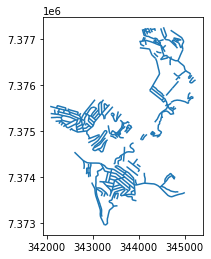

In [24]:
gdf_dxf.plot()

In [25]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str.replace('!', '1')

In [26]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.replace('MCT -', '')

In [27]:
gdf_dxf['lista'] = gdf_dxf.Layer.str.split(' - ')

In [28]:
gdf_dxf['DJI'] = gdf_dxf.Layer.str.findall('FERMOM_[0-9]{1,4}|MON[0-9]{2}')

In [29]:
gdf_dxf.DJI

0      [FERMOM_204]
1      [FERMOM_199]
2           [MON09]
3       [FERMOM_82]
4       [FERMOM_88]
           ...     
229    [FERMOM_139]
230    [FERMOM_132]
231    [FERMOM_187]
232    [FERMOM_174]
233    [FERMOM_185]
Name: DJI, Length: 234, dtype: object

In [30]:
# gdf_dxf['etapa'] = gdf_dxf.Layer.str.extract('(ETAPA [0-9]{1,2})')

In [31]:
gdf_dxf['data_voo'] = gdf_dxf.Layer.str.extract('([0-9]{1,2}_[0-9]{2}_[0-9]{2})')

In [32]:
gdf_dxf['logradouro'] = gdf_dxf.lista.apply(lambda x: x[0])

In [33]:
gdf_dxf.loc[gdf_dxf['data_voo'].isna(), 'Layer'].to_list()

['RUA MONTE DAS OLIVEIRAS - FERMOM_199',
 ' RUA VASCO DA GAMA',
 ' RUA VINTE E NOVE DE JULHO',
 ' RUA DR. AFONSO PENA JÚNIOR',
 ' RUA GREGÓRIO VITÓRIO MORASSI',
 ' AVENIDA DA INVERNADA',
 ' RUA FELICINA',
 ' RUA HIDORO CUSTODIO',
 ' RUA NOVO HORIZONTE',
 ' RUA QUINZE DE NOVEMBRO',
 ' RUA CINCO DE OUTUBRO',
 'RUA MONTE DAS OLIVEIRAS - FERMOM_199',
 ' RUA SAMUEL RÉIS DE OLIVEIRA',
 ' RUA BÉLEM',
 ' RUA ALMEIDA LEME',
 ' RUA PIRATININGA',
 ' RUA PRIMAVERIL',
 ' RUA MARIA JOSÉ DA SILVA',
 ' RUA DAS ZÍNIAS FILHO',
 ' RUA DÁCIO ÁGUIAR DE MORÃES',
 ' RUA MARIA JOSÉ DA SILVA',
 ' RUA PETROLINA',
 ' JOSÉ ARTHUR DA FROTA MOREIRA',
 'RUA MIN. BARROS MONTEIRO - FERMOM_8',
 ' RUA JERONIMO DE ATAÍDE',
 ' TV. CANTAREIRA',
 ' RUA COMANDANTE ELIAS JAFETE',
 '  RUA PADRE LÉO COMISSARI',
 '  TV. JOÃO AUGUSTO BECKER',
 ' PASSAGEM JESUS DE NAZARÉ',
 'RUA JESUS DE NAZARETH  - FERMOM_64',
 '  PRAÇA CONSELHEIRO SARAIVA',
 ' VIELA C',
 ' VIELA B']

In [35]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(FERMOM_[0-9]{1,4}|MON[0-9]{2})', expand=True)

,0,1,2,3,4,5,6,7,8,9
0,RUA 21 DE ABRIL -,08_01_20,None,21 -,None,FERMOM_204,,None,None,None
1,RUA MONTE DAS OLIVEIRAS -,None,FERMOM_199,,None,None,None,None,None,None
2,RUA ALTO DA BELA VISTA -,21_01_20,None,21 -,None,MON09,,None,None,None
3,PASSAGEM SANTO ANTONIO -,07_01_20,None,21 -,None,FERMOM_82,,None,None,None
4,PASSAGEM LUIZ GONZAGA -,07_01_20,None,21 -,None,FERMOM_88,,None,None,None
...,...,...,...,...,...,...,...,...,...,...
229,RUA ELOI BORGES -,08_01_20,None,21 -,None,FERMOM_139,,None,None,None
230,RUA VICENTE PASCHOALETTI -,07_01_20,None,21 -,None,FERMOM_132,,None,None,None
231,RUA GENIVAL FRANCISCO DA SILVA -,08_01_20,None,21 -,None,FERMOM_187,,None,None,None
232,RUA JOSÉ ALVES DA SILVA -,08_01_20,None,21 -,None,FERMOM_174,,None,None,None


In [37]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(FERMOM_[0-9]{1,4}|MON[0-9]{2})', expand=True)[3].unique().tolist()

['21 - ', '', None, '21- ', '21 -']

In [38]:
etapas = {
    '21 - ':'etapa_00', 
    '':'etapa_00',
    '21- ':'etapa_00',
    '21 -':'etapa_00'
}

In [39]:
len(etapas)

4

In [40]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(FERMOM_[0-9]{1,4})', expand=True)[3].map(etapas)

0      etapa_00
1      etapa_00
2           NaN
3      etapa_00
4      etapa_00
         ...   
229    etapa_00
230    etapa_00
231    etapa_00
232    etapa_00
233    etapa_00
Name: 3, Length: 234, dtype: object

In [41]:
gdf_dxf.loc[:, 'etapa'] = gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(FERMOM_[0-9]{1,4})|MON[0-9]{2}', expand=True)[3].map(etapas)

In [42]:
gdf_dxf.loc[:, 'etapa']

0      etapa_00
1      etapa_00
2      etapa_00
3      etapa_00
4      etapa_00
         ...   
229    etapa_00
230    etapa_00
231    etapa_00
232    etapa_00
233    etapa_00
Name: etapa, Length: 234, dtype: object

In [43]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry,lista,DJI,data_voo,logradouro,etapa
0,RUA 21 DE ABRIL - 08_01_2021 - FERMOM_204,None,AcDbEntity:AcDb2dPolyline,ByBlock,6F,None,"LINESTRING Z (345101.345 7376069.317 0.000, 34...","[RUA 21 DE ABRIL, 08_01_2021, FERMOM_204]",[FERMOM_204],08_01_20,RUA 21 DE ABRIL,etapa_00
1,RUA MONTE DAS OLIVEIRAS - FERMOM_199,None,AcDbEntity:AcDb2dPolyline,ByBlock,79,None,"LINESTRING Z (344843.032 7376194.570 0.000, 34...","[RUA MONTE DAS OLIVEIRAS, FERMOM_199]",[FERMOM_199],NaN,RUA MONTE DAS OLIVEIRAS,etapa_00
2,RUA ALTO DA BELA VISTA - 21_01_2021 - MON09,None,AcDbEntity:AcDb2dPolyline,ByBlock,7F,None,"LINESTRING Z (345021.110 7376313.351 0.000, 34...","[RUA ALTO DA BELA VISTA, 21_01_2021, MON09]",[MON09],21_01_20,RUA ALTO DA BELA VISTA,etapa_00
3,PASSAGEM SANTO ANTONIO - 07_01_2021 - FERMOM_82,None,AcDbEntity:AcDb2dPolyline,ByBlock,8A,None,"LINESTRING Z (344540.290 7376989.987 0.000, 34...","[PASSAGEM SANTO ANTONIO, 07_01_2021, FERMOM_82]",[FERMOM_82],07_01_20,PASSAGEM SANTO ANTONIO,etapa_00
4,PASSAGEM LUIZ GONZAGA - 07_01_2021 - FERMOM_88,None,AcDbEntity:AcDb2dPolyline,ByBlock,91,None,"LINESTRING Z (344331.718 7376698.640 0.000, 34...","[PASSAGEM LUIZ GONZAGA, 07_01_2021, FERMOM_88]",[FERMOM_88],07_01_20,PASSAGEM LUIZ GONZAGA,etapa_00
...,...,...,...,...,...,...,...,...,...,...,...,...
229,RUA ELOI BORGES - 08_01_2021 - FERMOM_139,None,AcDbEntity:AcDb2dPolyline,ByBlock,989,None,"LINESTRING Z (343681.483 7374510.715 0.000, 34...","[RUA ELOI BORGES, 08_01_2021, FERMOM_139]",[FERMOM_139],08_01_20,RUA ELOI BORGES,etapa_00
230,RUA VICENTE PASCHOALETTI - 07_01_2021 - FERMOM...,None,AcDbEntity:AcDb2dPolyline,ByBlock,98E,None,"LINESTRING Z (343621.835 7374474.660 0.000, 34...","[RUA VICENTE PASCHOALETTI, 07_01_2021, FERMOM_...",[FERMOM_132],07_01_20,RUA VICENTE PASCHOALETTI,etapa_00
231,RUA GENIVAL FRANCISCO DA SILVA - 08_01_2021 - ...,None,AcDbEntity:AcDb2dPolyline,ByBlock,999,None,"LINESTRING Z (343981.972 7374032.712 0.000, 34...","[RUA GENIVAL FRANCISCO DA SILVA, 08_01_2021, F...",[FERMOM_187],08_01_20,RUA GENIVAL FRANCISCO DA SILVA,etapa_00
232,RUA JOSÉ ALVES DA SILVA - 08_01_2021 - FERMOM_174,None,AcDbEntity:AcDb2dPolyline,ByBlock,9A0,None,"LINESTRING Z (344035.289 7374222.113 0.000, 34...","[RUA JOSÉ ALVES DA SILVA, 08_01_2021, FERMOM_174]",[FERMOM_174],08_01_20,RUA JOSÉ ALVES DA SILVA,etapa_00


In [44]:
pd_videos = pd.DataFrame(list(map(lambda x: 
         list(map(lambda y: y + '.MOV', x))
         , gdf_dxf.DJI))).add_prefix('Video_')

In [45]:
pd_videos

,Video_0,Video_1
0,FERMOM_204.MOV,None
1,FERMOM_199.MOV,None
2,MON09.MOV,None
3,FERMOM_82.MOV,None
4,FERMOM_88.MOV,None
...,...,...
229,FERMOM_139.MOV,None
230,FERMOM_132.MOV,None
231,FERMOM_187.MOV,None
232,FERMOM_174.MOV,None


In [46]:
gdf_dxf = gdf_dxf.merge(pd_videos, left_index=True, right_index=True)

In [47]:
gdf_dxf.columns

Index(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text',
       'geometry', 'lista', 'DJI', 'data_voo', 'logradouro', 'etapa',
       'Video_0', 'Video_1'],
      dtype='object')

In [48]:
gdf_dxf.loc[gdf_dxf.etapa.isna(), 'etapa'] = ''

In [49]:
gdf_dxf.etapa = gdf_dxf.etapa.str.replace(' ', '_')

In [50]:
gdf_dxf.loc[gdf_dxf.etapa != '', 'etapa'] += '/'

In [51]:
gdf_dxf.loc[~gdf_dxf.data_voo.isna(), 'data_voo'] += '/'

In [52]:
for c in gdf_dxf.loc[:, gdf_dxf.columns.str.startswith('Video')].columns:
    gdf_dxf[c + '_path'] = 'videos/' + bairro.lower().replace('-', '_') + '/' + gdf_dxf.etapa + gdf_dxf[c]

In [53]:
gdf_dxf = gdf_dxf.dissolve(by=['Layer'], aggfunc='first').reset_index()

In [54]:
gdf_dxf.crs = 'epsg:31983'

In [55]:
gdf_dxf

,Layer,geometry,PaperSpace,SubClasses,Linetype,EntityHandle,Text,lista,DJI,data_voo,logradouro,etapa,Video_0,Video_1,Video_0_path,Video_1_path
0,PRAÇA CONSELHEIRO SARAIVA,"LINESTRING Z (343399.537 7373661.141 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,8A4,None,[ PRAÇA CONSELHEIRO SARAIVA],[],None,PRAÇA CONSELHEIRO SARAIVA,,None,None,None,None
1,RUA PADRE LÉO COMISSARI,"LINESTRING Z (343223.842 7374203.995 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,694,None,[ RUA PADRE LÉO COMISSARI],[],None,RUA PADRE LÉO COMISSARI,,None,None,None,None
2,TV. JOÃO AUGUSTO BECKER,"LINESTRING Z (342978.304 7373882.081 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,6CD,None,[ TV. JOÃO AUGUSTO BECKER],[],None,TV. JOÃO AUGUSTO BECKER,,None,None,None,None
3,AVENIDA DA INVERNADA,"LINESTRING Z (343210.407 7373661.166 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,28A,None,[ AVENIDA DA INVERNADA],[],None,AVENIDA DA INVERNADA,,None,None,None,None
4,JOSÉ ARTHUR DA FROTA MOREIRA,"LINESTRING Z (342344.808 7375229.735 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,5AC,None,[ JOSÉ ARTHUR DA FROTA MOREIRA],[],None,JOSÉ ARTHUR DA FROTA MOREIRA,,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,TV. VIODA NOVA - 07_01_2021 - FERMOM_123,"LINESTRING Z (342865.831 7374092.746 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,277,None,"[TV. VIODA NOVA, 07_01_2021, FERMOM_123]",[FERMOM_123],07_01_20/,TV. VIODA NOVA,etapa_00/,FERMOM_123.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None
201,VIELA 20 - 21_01_2021 - MON16,"LINESTRING Z (344840.223 7377007.224 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,3F4,None,"[VIELA 20, 21_01_2021, MON16]",[MON16],21_01_20/,VIELA 20,etapa_00/,MON16.MOV,None,videos/ferrazopolis_montanhao/etapa_00/MON16.MOV,None
202,VIELA 2A - 07_01_2021 - FERMOM_122,"LINESTRING Z (342895.366 7374195.576 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,739,None,"[VIELA 2A, 07_01_2021, FERMOM_122]",[FERMOM_122],07_01_20/,VIELA 2A,etapa_00/,FERMOM_122.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None
203,VIELA 3 - 07_01_2021 - FERMOM_121,"LINESTRING Z (342907.559 7374289.031 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,734,None,"[VIELA 3, 07_01_2021, FERMOM_121]",[FERMOM_121],07_01_20/,VIELA 3,etapa_00/,FERMOM_121.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None


In [56]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista'], axis=1)

,geometry,data_voo,logradouro,etapa,Video_0,Video_1,Video_0_path,Video_1_path
0,"LINESTRING Z (343399.537 7373661.141 0.000, 34...",None,PRAÇA CONSELHEIRO SARAIVA,,None,None,None,None
1,"LINESTRING Z (343223.842 7374203.995 0.000, 34...",None,RUA PADRE LÉO COMISSARI,,None,None,None,None
2,"LINESTRING Z (342978.304 7373882.081 0.000, 34...",None,TV. JOÃO AUGUSTO BECKER,,None,None,None,None
3,"LINESTRING Z (343210.407 7373661.166 0.000, 34...",None,AVENIDA DA INVERNADA,,None,None,None,None
4,"LINESTRING Z (342344.808 7375229.735 0.000, 34...",None,JOSÉ ARTHUR DA FROTA MOREIRA,,None,None,None,None
...,...,...,...,...,...,...,...,...
200,"LINESTRING Z (342865.831 7374092.746 0.000, 34...",07_01_20/,TV. VIODA NOVA,etapa_00/,FERMOM_123.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None
201,"LINESTRING Z (344840.223 7377007.224 0.000, 34...",21_01_20/,VIELA 20,etapa_00/,MON16.MOV,None,videos/ferrazopolis_montanhao/etapa_00/MON16.MOV,None
202,"LINESTRING Z (342895.366 7374195.576 0.000, 34...",07_01_20/,VIELA 2A,etapa_00/,FERMOM_122.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None
203,"LINESTRING Z (342907.559 7374289.031 0.000, 34...",07_01_20/,VIELA 3,etapa_00/,FERMOM_121.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None


In [57]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'etapa', 'data_voo', 'Video_0', 'Video_1'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB.gpkg', driver='GPKG')

In [58]:
gdf_dxf.to_crs('EPSG:4326').drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'etapa', 'data_voo', 'Video_0', 'Video_1'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB.geojson', driver='GeoJSON')

In [59]:
gdf_dxf.dtypes

Layer             object
geometry        geometry
PaperSpace        object
SubClasses        object
Linetype          object
EntityHandle      object
Text              object
lista             object
DJI               object
data_voo          object
logradouro        object
etapa             object
Video_0           object
Video_1           object
Video_0_path      object
Video_1_path      object
dtype: object

In [60]:
gdf_dxf.Video_0.isna().value_counts()

False    176
True      29
Name: Video_0, dtype: int64